In [13]:
import tensorflow
from tensorflow.keras import layers, models

In [14]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [15]:
tensorflow.keras.__version__

'3.10.0'

In [19]:
if tensorflow.config.list_physical_devices('GPU'):
    print("✅ GPU is available")
else:
    print("❌ GPU is not available")

❌ GPU is not available


In [23]:
import matplotlib.pyplot as plt
import numpy as np

dataset = keras.preprocessing.image_dataset_from_directory(
    "D:/Project-to-learn/Agriculture_Potato_Disease_Classification/Data/PlantVillage",
    shuffle=True,
    image_size=(256, 256),
    batch_size=32,
    validation_split=0.2,
    subset="both",
    seed=42,
    label_mode="categorical"
)

Found 2152 files belonging to 3 classes.
Using 1722 files for training.
Using 430 files for validation.


In [27]:
training_set, validation_set = dataset

training_set = training_set.prefetch(buffer_size=32)
validation_set = validation_set.prefetch(buffer_size=32)


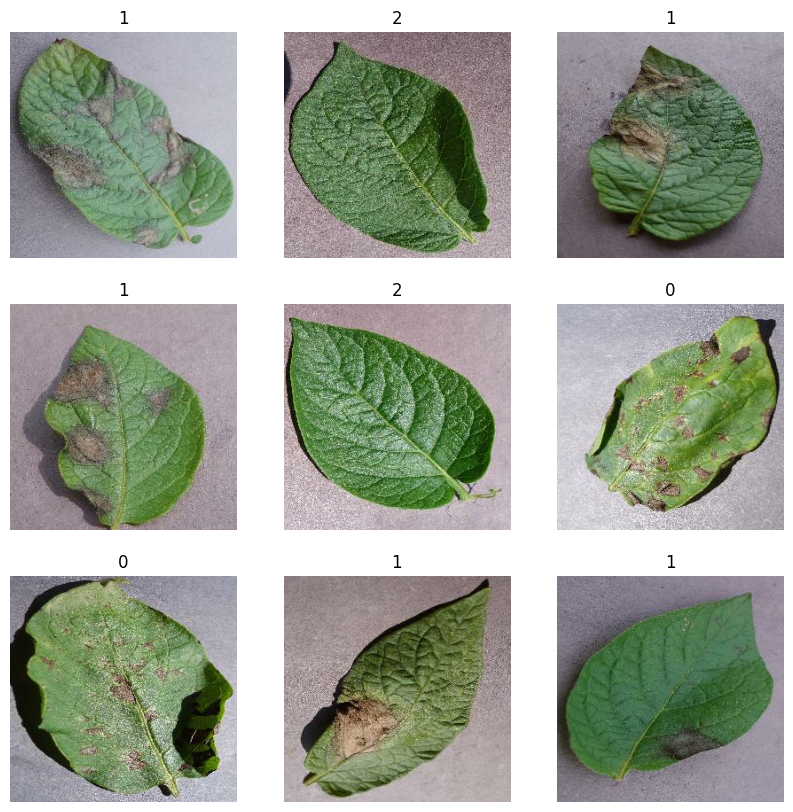

In [ ]:
figsize = (10, 10)
plt.figure(figsize=figsize)
for images, labels in training_set.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(np.argmax(labels[i])))

In [31]:
def create_model(input_shape, num_classes):
    model = Sequential()

    # Convolutional layers
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    
    # Flatten the output from the convolutional layers
    model.add(Flatten())
    
    # Fully connected layers
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

input_shape = (256, 256, 3)
num_classes = 3
model = create_model(input_shape, num_classes)
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    58,982,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,077,699 (225.36 MB)

 Trainable params: 59,077,699 (225.36 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
                metrics=['accuracy'])
history = model.fit(
    training_set,
    validation_data=validation_set,
    epochs=10
)

Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 36s 600ms/step - accuracy: 0.5590 - loss: 372.0532 - val_accuracy: 0.7163 - val_loss: 0.7711
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 47s 859ms/step - accuracy: 0.7976 - loss: 0.6168 - val_accuracy: 0.7302 - val_loss: 0.7276
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 49s 898ms/step - accuracy: 0.8609 - loss: 0.4137 - val_accuracy: 0.7674 - val_loss: 0.6943
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 45s 836ms/step - accuracy: 0.9142 - loss: 0.2574 - val_accuracy: 0.7465 - val_loss: 0.8126
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 45s 831ms/step - accuracy: 0.9463 - loss: 0.1781 - val_accuracy: 0.7256 - val_loss: 0.8857
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 44s 824ms/step - accuracy: 0.9358 - loss: 0.1857 - val_accuracy: 0.7465 - val_loss: 1.3018
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 45s 821ms/step - accuracy: 0.9599 - loss: 0.1318 - val_accuracy: 0.7488 - val_loss: 1.4003
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 45s 832ms/step - accuracy: 0.9641 - loss: 0.1786 - val_ac

Text(0, 0.5, 'Accuracy')

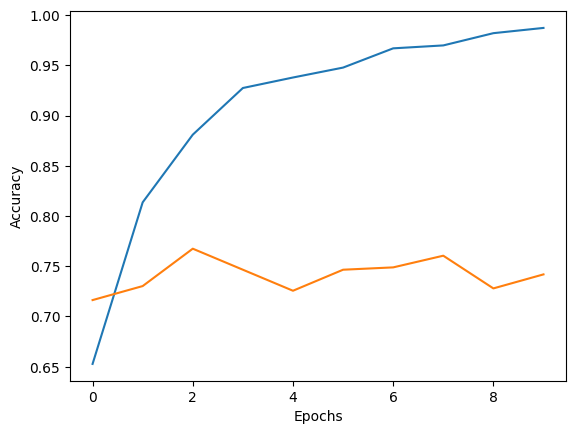

In [35]:
history.history.keys()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [36]:
# Save the trained model
model.save('potato_disease_model.h5')

In [37]:
#Test accuracy
loss, accuracy = model.evaluate(validation_set)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.7510 - loss: 1.8057
Validation Loss: 1.6996111869812012
Validation Accuracy: 0.7418604493141174


In [41]:
#test data accuracy

def predict_image(model, image_path, class_names):
    img = keras.preprocessing.image.load_img(image_path, target_size=(256, 256))
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Create batch axis
    img_array = img_array / 255.0  # Normalize the image

    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = np.max(predictions[0])

    return predicted_class, confidence
